# Exploration of the Dynamic Solow Model

## Imports

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import copy
import matplotlib
import pickle
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

In [4]:
from solowModel2 import SolowModel
from phase_diagram import PhaseDiagram

In [5]:
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':16})
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=16)

## General Case

The solver successfully reached the end of the integration interval.


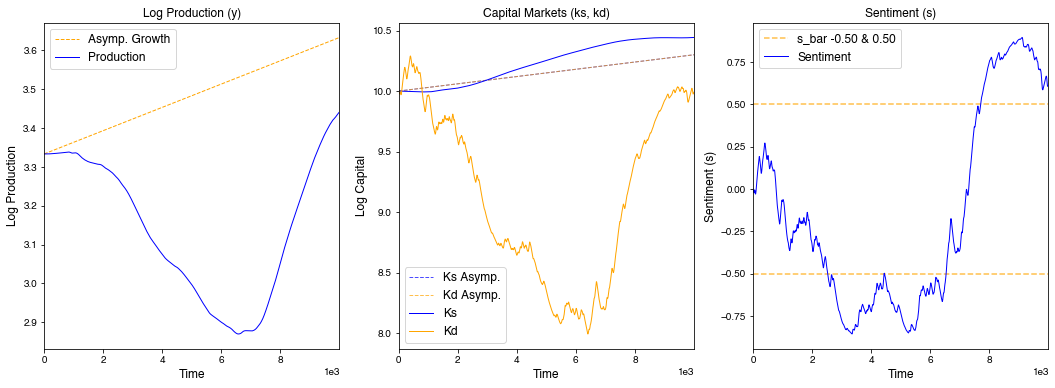

In [14]:
gamma = 3000
params = {
    'tech0':np.exp(1), 'rho':1/3, 'epsilon':2e-5, 'tau_y':1000, 'dep':0.0002,
    "tau_h" : 25, "tau_s" : 250, "c1" : 1, "c2" : 4/(3*gamma), "gamma":gamma,
    "beta1" : 1.1, "beta2" : 1.0, 'saving0':0.15, "s0" : 0, "h_h":10
}

start = np.array([1, 10, 10, 0, 0, 1, params['saving0']])
start[0] = params['epsilon'] + params['rho'] * min(start[1:3])

sm = SolowModel(params)
path = sm.solve(start, t_end=1e4, seed=40, case='general', save=True)
_ = sm.overview()

## Limiting Ks<Kd case?

The solver successfully reached the end of the integration interval.


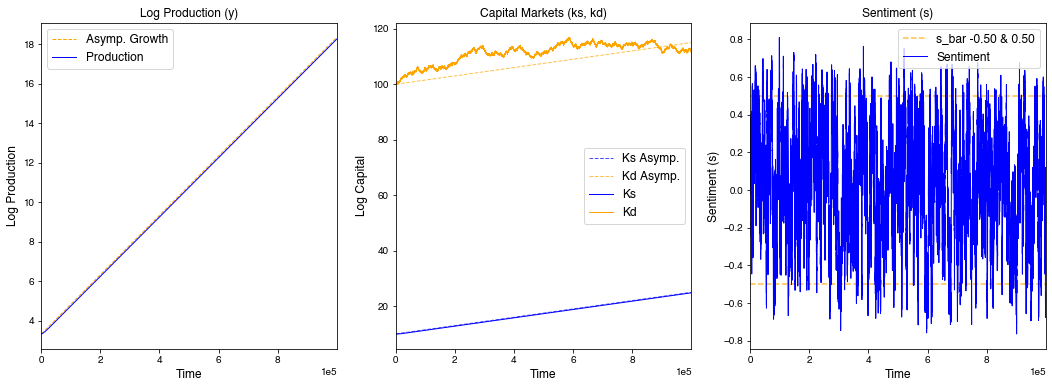

In [21]:
gamma = 3000
params = {
    'tech0':np.exp(1), 'rho':1/3, 'epsilon':1e-5, 'tau_y':1000, 'dep':0.0002,
    "tau_h" : 25, "tau_s" : 250, "c1" : 1, "c2" : 4/(3*gamma), "gamma":gamma,
    "beta1" : 1.1, "beta2" : 1.0, 'saving0':0.15, "s0" : 0, "h_h":10
}

start = np.array([1, 10, 100, 0, 0, 1, params['saving0']])
start[0] = params['epsilon'] + params['rho'] * min(start[1:3])

sm = SolowModel(params)
path = sm.solve(start, t_end=1e6, seed=40, case='general', save=True)
_ = sm.overview()

The solver successfully reached the end of the integration interval.


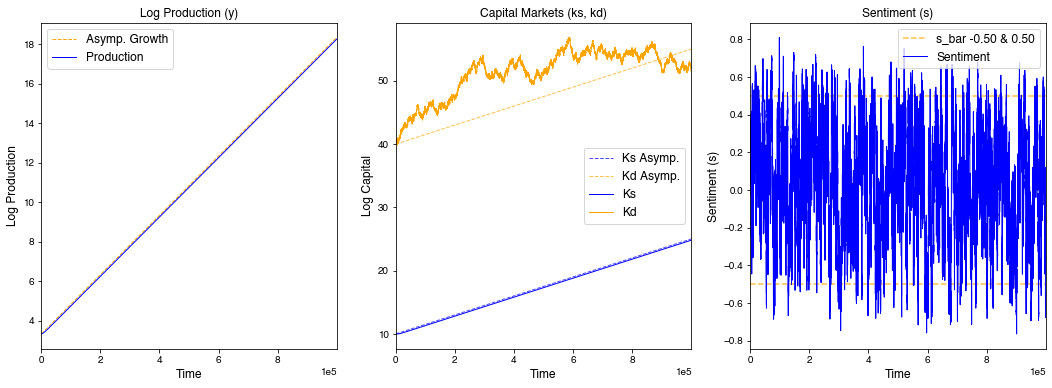

In [23]:
gamma = 3000
params = {
    'tech0':np.exp(1), 'rho':1/3, 'epsilon':1e-5, 'tau_y':1000, 'dep':0.0002,
    "tau_h" : 25, "tau_s" : 250, "c1" : 1, "c2" : 4/(3*gamma), "gamma":gamma,
    "beta1" : 1.1, "beta2" : 1.0, 'saving0':0.15, "s0" : 0, "h_h":10
}

start = np.array([1, 10, 40, 0, 0, 1, params['saving0']])
start[0] = params['epsilon'] + params['rho'] * min(start[1:3])

sm = SolowModel(params)
path = sm.solve(start, t_end=1e6, seed=40, case='general', save=True)


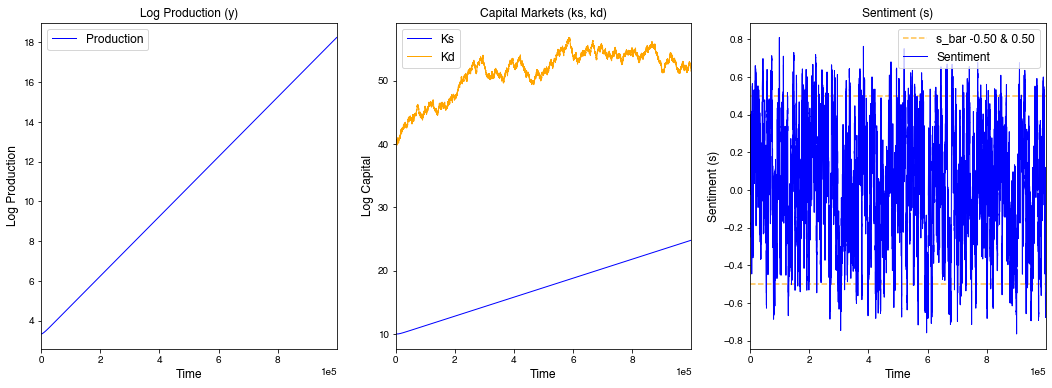

In [24]:
_ = sm.overview(asymptotics=False)

## Unbounded Information Case

The solver successfully reached the end of the integration interval.
{'psi_y': 1.5000000000000002e-05, 'psi_ks': 1.5000000000000002e-05, 'psi_kd': 1.5000000000000002e-05, 's_bar_top': 0.6237595446598544, 's_bar_bottom': -0.30151134659774637, 'gamma_psi_y': (0.045, True), 's_bar_cond': (0.02048122717815065, 0.045000000000000005, False)}


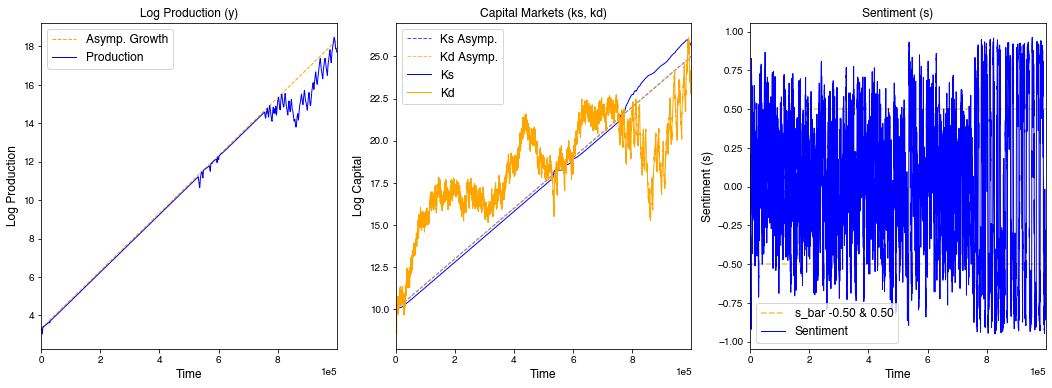

In [22]:
gamma = 3000
params = {
    'tech0':np.exp(1), 'rho':1/3, 'epsilon':1e-5, 'tau_y':1000, 'dep':0.0002,
    "tau_h" : 25, "tau_s" : 250, "c1" : 1, "c2" : 4/(3*gamma), "gamma":gamma,
    "beta1" : 1.1, "beta2" : 1.0, 'saving0':0.15, "s0" : 0, "h_h":10
}

start = np.array([1, 10, 10, 0, 0, 1, params['saving0']])
start[0] = params['epsilon'] + params['rho'] * min(start[1:3])

sm = SolowModel(params)
path = sm.solve(start, t_end=1e6, seed=40, case='unbounded_information', save=True)
print(sm.analytics())
sm.overview()

## Whether or not to tanh patch

The solver successfully reached the end of the integration interval.
{'psi_y': 3.125e-05, 'psi_ks': 3.125e-05, 'psi_kd': 3.375000000000001e-05, 's_bar_top': 0.6958211601416392, 's_bar_bottom': -0.301511347738697, 'gamma_psi_y': (0.09375, True), 's_bar_cond': (0.02048122717815065, 0.09375, False)}


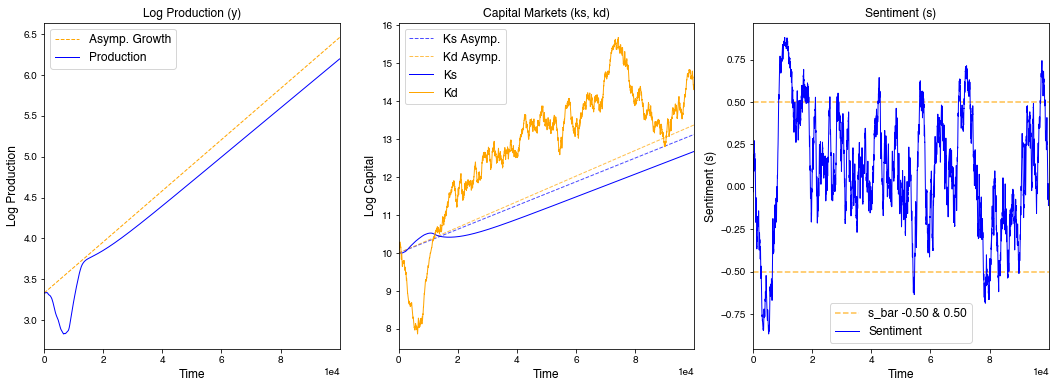

In [9]:
gamma = 1000
params = {
    'tech0':np.exp(1), 'rho':1/3, 'epsilon':2e-5, 'tau_y':1000, 'dep':0.0002,
    "tau_h" : 25, "tau_s" : 250, "c1" : 1, "c2" : 4/(3*gamma), "gamma":gamma,
    "beta1" : 1.1, "beta2" : 1.0, 'saving0':0.15, "s0" : 0, "h_h":10
}

start = np.array([1, 10, 10, 0, 0, 1, params['saving0']])
start[0] = params['epsilon'] + params['rho'] * min(start[1:3])

sm_general = SolowModel(params)
path = sm_general.solve(start, t_end=1e5, seed=40, case='general', save=True)
print(sm_general.analytics())
sm_general.overview()

The solver successfully reached the end of the integration interval.
{'psi_y': 3.9603960396039605e-05, 'psi_ks': 3.9603960396039605e-05, 'psi_kd': 5.8811881188118814e-05, 's_bar_top': 0.8108791919591598, 's_bar_bottom': -0.3015113431851737, 'gamma_psi_y': (0.23762376237623759, True), 's_bar_cond': (0.02048122717815065, 0.23762376237623764, False)}


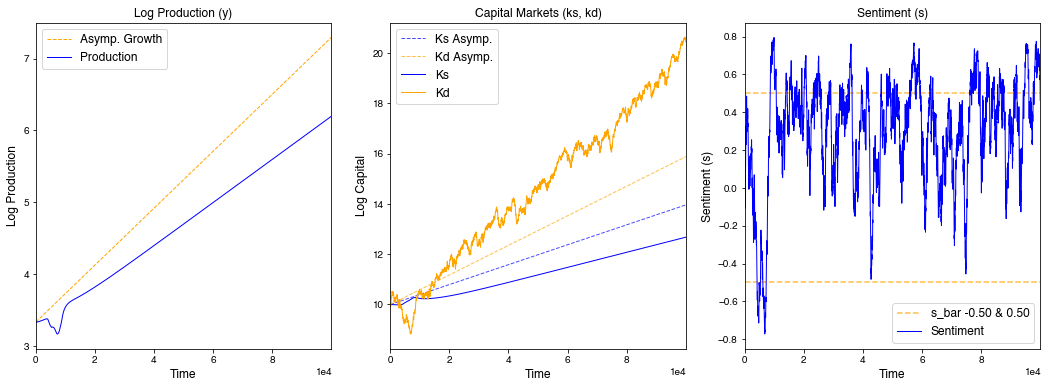

In [19]:
gamma = 1000
params = {
    'tech0':np.exp(1), 'rho':1/3, 'epsilon':2e-5, 'tau_y':1000, 'dep':0.0002,
    "tau_h" : 25, "tau_s" : 250, "c1" : 1, "c2" : 3.3e-04, "gamma":gamma,
    "beta1" : 1.1, "beta2" : 1.0, 'saving0':0.15, "s0" : 0, "h_h":10
}

start = np.array([1, 10, 10, 0, 0, 1, params['saving0']])
start[0] = params['epsilon'] + params['rho'] * min(start[1:3])

sm_nopatch = SolowModel(params, xi_args=dict(decay=0.2, diffusion=2.5))
path = sm_nopatch.solve(start, t_end=1e5, seed=40, case='general_no_patch', save=True)
print(sm_nopatch.analytics())
sm_nopatch.overview()

## General Case Tester

The solver successfully reached the end of the integration interval.
{'psi_y': 3.0000000000000004e-05, 'psi_ks': 3.0000000000000004e-05, 'psi_kd': 3.0000000000000004e-05, 's_bar_top': 0.6912860057003432, 's_bar_bottom': -0.301511347738697, 'gamma_psi_y': (0.09, True), 's_bar_cond': (0.02048122717815065, 0.09000000000000001, False)}


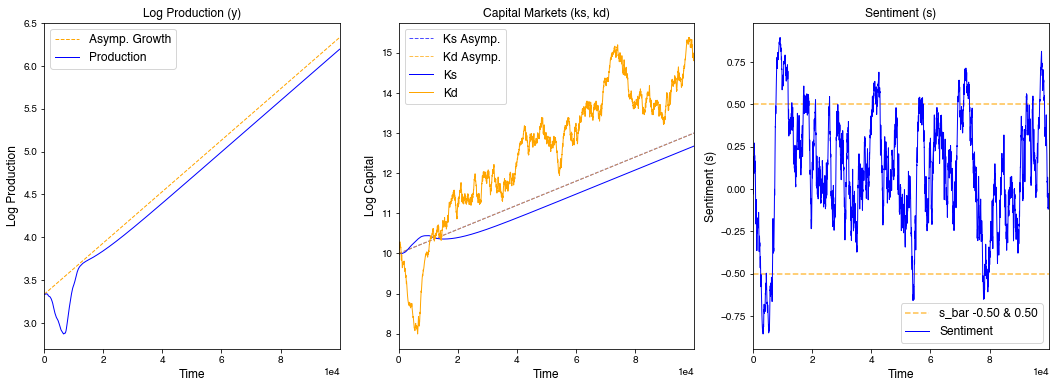

In [7]:
gamma = 3000
params = {
    'tech0':np.exp(1), 'rho':1/3, 'epsilon':2e-5, 'tau_y':1000, 'dep':0.0002,
    "tau_h" : 25, "tau_s" : 250, "c1" : 1, "c2" : 4/(3*gamma), "gamma":gamma,
    "beta1" : 1.1, "beta2" : 1.0, 'saving0':0.15, "s0" : 0, "h_h":10
}

start = np.array([1, 10, 10, 0, 0, 1, params['saving0']])
start[0] = params['epsilon'] + params['rho'] * min(start[1:3])

sm_outside = SolowModel(params)
path = sm_outside.solve(start, t_end=1e5, seed=40, case='general', save=False)
print(sm_outside.analytics())
sm_outside.overview()

The solver successfully reached the end of the integration interval.
{'psi_y': 5e-05, 'psi_ks': 5e-05, 'psi_kd': 8.999999999999999e-05, 's_bar_top': 0.751714868214717, 's_bar_bottom': -0.301511347738697, 'gamma_psi_y': (0.15000000000000005, True), 's_bar_cond': (0.02048122717815065, 0.15, False)}


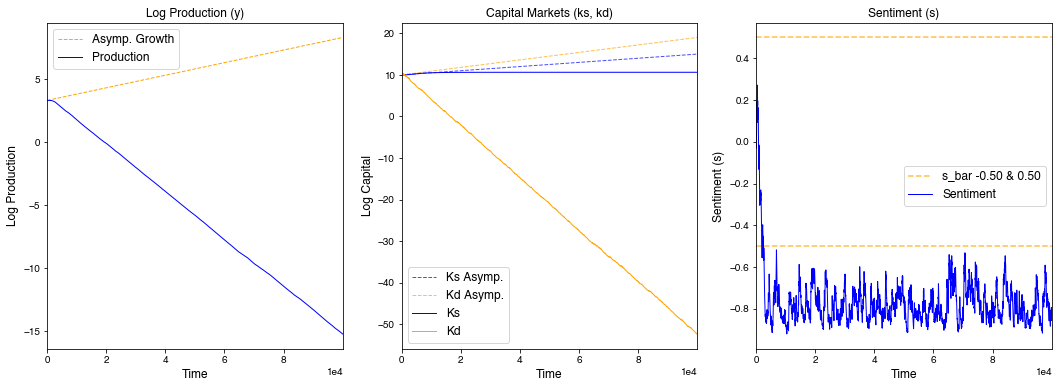

In [14]:
gamma = 3000
params = {
    'tech0':np.exp(1), 'rho':1/3, 'epsilon':2e-5, 'tau_y':1000, 'dep':0.0002,
    "tau_h" : 25, "tau_s" : 250, "c1" : 1, "c2" : 8e-4, "gamma":gamma,
    "beta1" : 1.1, "beta2" : 1.0, 'saving0':0.15, "s0" : 0, "h_h":10
}

start = np.array([1, 10, 10, 0, 0, 1, params['saving0']])
start[0] = params['epsilon'] + params['rho'] * min(start[1:3])

sm_inside = SolowModel(params)
path_inside = sm_inside.solve(start, t_end=1e5, seed=40, case='general', save=False)
print(sm_inside.analytics())
sm_inside.overview()

The solver successfully reached the end of the integration interval.
{'psi_y': 4.2105263157894745e-05, 'psi_ks': 4.2105263157894745e-05, 'psi_kd': 6.631578947368423e-05, 's_bar_top': 0.7305642950417164, 's_bar_bottom': -0.301511347738697, 'gamma_psi_y': (0.1263157894736842, True), 's_bar_cond': (0.02048122717815065, 0.12631578947368424, False)}


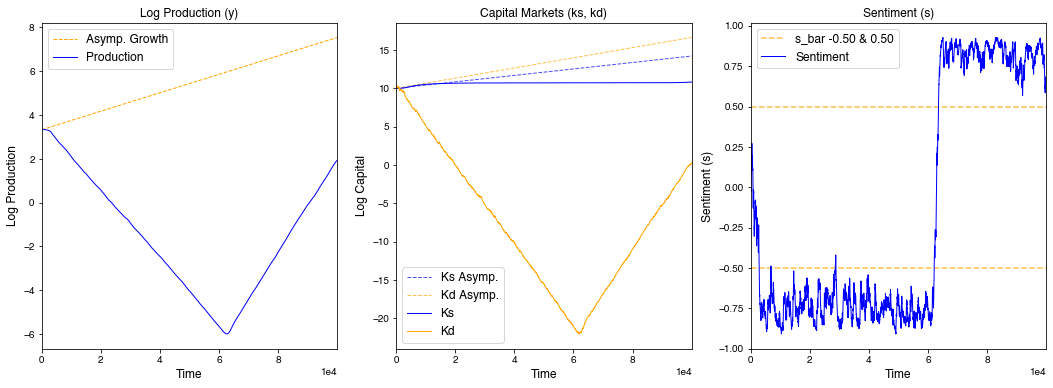

In [15]:
gamma = 3000
params = {
    'tech0':np.exp(1), 'rho':1/3, 'epsilon':2e-5, 'tau_y':1000, 'dep':0.0002,
    "tau_h" : 25, "tau_s" : 250, "c1" : 1, "c2" : 7e-4, "gamma":gamma,
    "beta1" : 1.1, "beta2" : 1.0, 'saving0':0.15, "s0" : 0, "h_h":10
}

start = np.array([1, 10, 10, 0, 0, 1, params['saving0']])
start[0] = params['epsilon'] + params['rho'] * min(start[1:3])

sm_mid = SolowModel(params)
path_mid = sm_mid.solve(start, t_end=1e5, seed=40, case='general', save=False)
print(sm_mid.analytics())
sm_mid.overview()

The solver successfully reached the end of the integration interval.
{'psi_y': 1.5e-05, 'psi_ks': 1.5e-05, 'psi_kd': 1.5e-05, 's_bar_top': 0.5547730441688308, 's_bar_bottom': -0.41372790346950433, 'gamma_psi_y': (0.015, True), 's_bar_cond': (0.02048122717815065, 0.015000000000000001, True)}


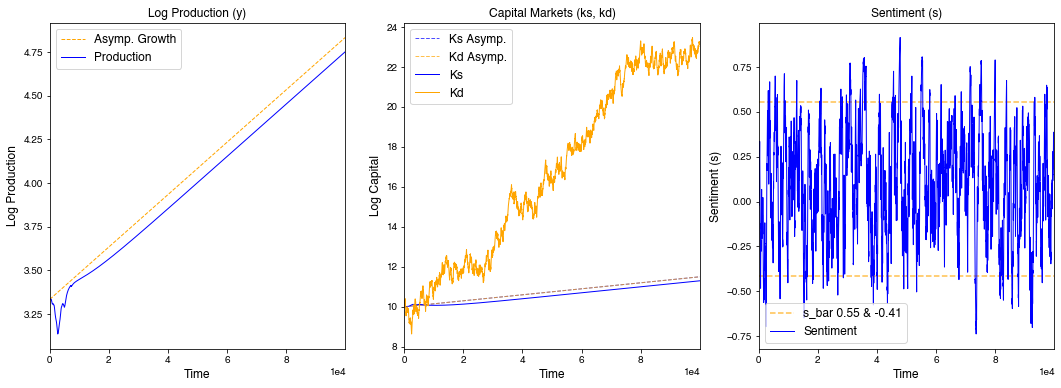

In [98]:
gamma = 1000
params = {
    'tech0':np.exp(1), 'rho':1/3, 'epsilon':1e-5, 'tau_y':1000, 'dep':0.0002,
    "tau_h" : 25, "tau_s" : 250, "c1" : 1, "c2" : 4/(3*gamma), "gamma":gamma,
    "beta1" : 1.1, "beta2" : 1.0, 'saving0':0.15, "s0" : 0, "h_h":10
}

start = np.array([1, 10, 10, 0, 0, 1, params['saving0']])
start[0] = params['epsilon'] + params['rho'] * min(start[1:3])

sm1 = SolowModel(params, xi_args=dict(decay=0.2, diffusion=2.0))
path = sm1.solve(start, t_end=1e5, seed=40, case='unbounded_information', save=True)
print(sm1.analytics())
sm1.overview()

The solver successfully reached the end of the integration interval.
{'psi_y': 1.8181818181818185e-05, 'psi_ks': 1.8181818181818185e-05, 'psi_kd': 2.4545454545454552e-05, 's_bar_top': 0.5867558954291816, 's_bar_bottom': -0.30151134659774637, 'gamma_psi_y': (0.05454545454545454, True), 's_bar_cond': (0.02048122717815065, 0.02727272727272728, False)}


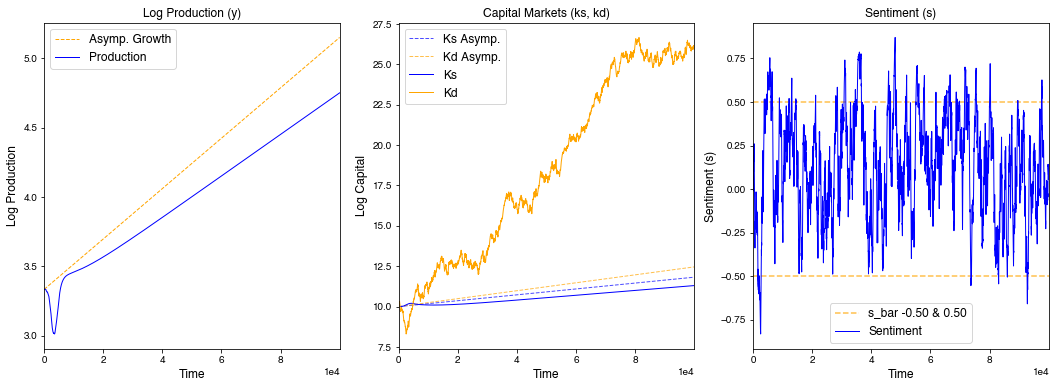

In [101]:
b2_g_c2 = 1.8
b2 = 0.5
gamma = 3000
params = {
    'tech0':np.exp(1), 'rho':1/3, 'epsilon':1e-5, 'tau_y':1000, 'dep':0.0002,
    "tau_h" : 25, "tau_s" : 250, "c1" : 1, "c2" : b2_g_c2/(b2*gamma), "gamma":gamma,
    "beta1" : 1.1, "beta2" : b2, 'saving0':0.15, "s0" : 0, "h_h":10
}

start = np.array([1, 10, 10, 0, 0, 1, params['saving0']])
start[0] = params['epsilon'] + params['rho'] * min(start[1:3])

sm1 = SolowModel(params, xi_args=dict(decay=0.2, diffusion=2.0))
path = sm1.solve(start, t_end=1e5, seed=40, case='unbounded_information', save=True)
print(sm1.analytics())
sm1.overview()

The solver successfully reached the end of the integration interval.
{'psi_y': 1.8181818181818185e-05, 'psi_ks': 1.8181818181818185e-05, 'psi_kd': 2.4545454545454552e-05, 's_bar_top': 0.6406248094607052, 's_bar_bottom': -0.3015113467563061, 'gamma_psi_y': (0.05454545454545454, True), 's_bar_cond': (0.02048122717815065, 0.05454545454545456, False)}


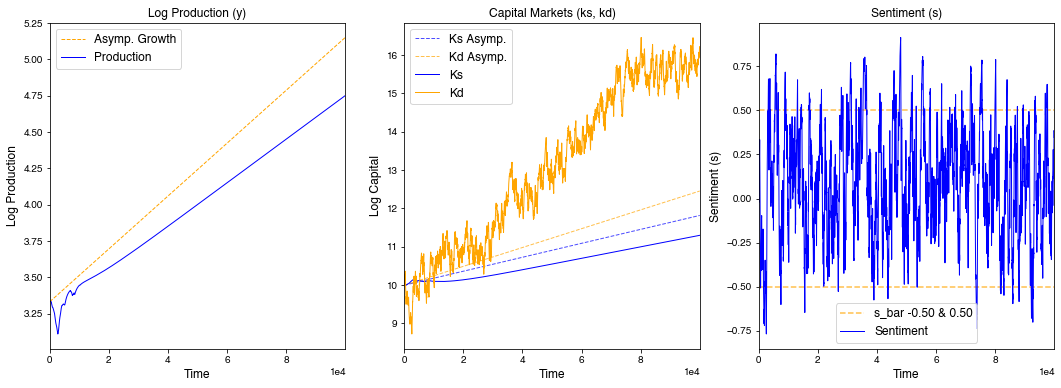

In [100]:
b2_g_c2 = 1.8
b2 = 1.0
gamma = 3000
params = {
    'tech0':np.exp(1), 'rho':1/3, 'epsilon':1e-5, 'tau_y':1000, 'dep':0.0002,
    "tau_h" : 25, "tau_s" : 250, "c1" : 1, "c2" : b2_g_c2/(b2*gamma), "gamma":gamma,
    "beta1" : 1.1, "beta2" : b2, 'saving0':0.15, "s0" : 0, "h_h":10
}

start = np.array([1, 10, 10, 0, 0, 1, params['saving0']])
start[0] = params['epsilon'] + params['rho'] * min(start[1:3])

sm1 = SolowModel(params, xi_args=dict(decay=0.2, diffusion=2.0))
path = sm1.solve(start, t_end=1e5, seed=40, case='unbounded_information', save=True)
print(sm1.analytics())
sm1.overview()

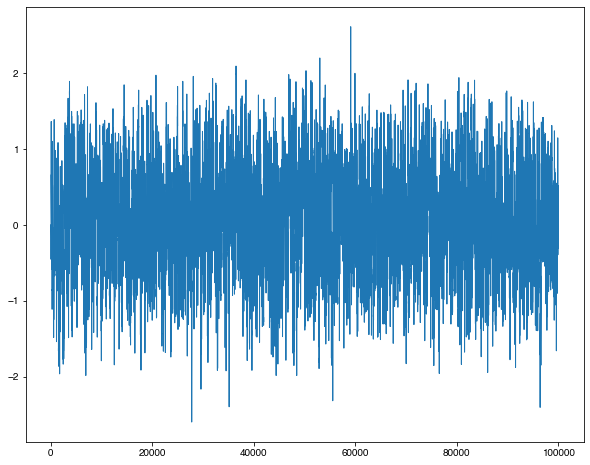

In [96]:
plt.plot(sm1.path.h)
plt.show()

asymptotics

In [ ]:
b2_g_c2 = 4/3 #4/3
b2 = 1.0
gamma = 1000
params = {
    'tech0':np.exp(1), 'rho':1/3, 'epsilon':1e-5, 'tau_y':1000, 'dep':0.0002,
    "tau_h" : 25, "tau_s" : 250, "c1" : 1, "c2" : b2_g_c2/(b2*gamma), "gamma":gamma,
    "beta1" : 1.1, "beta2" : b2, 'saving0':0.15, "s0" : 0, "h_h":10
}

start = np.array([1, 10, 10, 0, 0, 1, params['saving0']])
start[0] = params['epsilon'] + params['rho'] * min(start[1:3])

sm2 = SolowModel(params, xi_args=dict(decay=0.2, diffusion=2.0))
path = sm1.solve(start, t_end=1e6, seed=40, case='unbounded_information', save=True)
print(sm2.analytics())
sm2.overview()

In [ ]:
b2_g_c2 = 1.8
b2 = 1.0
gamma = 11000
params = {
    'tech0':np.exp(1), 'rho':1/3, 'epsilon':1e-5, 'tau_y':2000, 'dep':0.0002,
    "tau_h" : 25, "tau_s" : 250, "c1" : 1, "c2" : b2_g_c2/(b2*gamma), "gamma":gamma,
    "beta1" : 1.1, "beta2" : 1.0, 'saving0':0.15, "s0" : 0, "h_h":10
}

start = np.array([1, 10, 10, 0, 0, 1, params['saving0']])
start[0] = params['epsilon'] + params['rho'] * min(start[1:3])

sm_dimitri = SolowModel(params, xi_args=dict(decay=0.2, diffusion=2.0))
path = sm_dimitri.solve(start, t_end=1e5, seed=40, case='general', save=False)
print(sm_dimitri.analytics())
sm_dimitri.overview()

In [104]:
# Asymptotic Divergence
b2_g_c2 = 1 #4/3
b2 = 1.0
gamma = 1000
params = {
    'tech0':np.exp(1), 'rho':1/3, 'epsilon':1e-5, 'tau_y':1000, 'dep':0.0002,
    "tau_h" : 25, "tau_s" : 250, "c1" : 1, "c2" : b2_g_c2/(b2*gamma), "gamma":gamma,
    "beta1" : 1.1, "beta2" : b2, 'saving0':0.15, "s0" : 0, "h_h":10
}

start = np.array([1, 10, 10, 0, 0, 1, params['saving0']])
start[0] = params['epsilon'] + params['rho'] * min(start[1:3])

sm1 = SolowModel(params, xi_args=dict(decay=0.2, diffusion=2.0))
rates = sm1.analytics()
psi_ks, psi_kd = rates['psi_ks'], rates['psi_kd']

/Users/karlnaumann/Library/Mobile Documents/com~apple~CloudDocs/Python/00_virtualenvironments/venv_EP_Stage/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


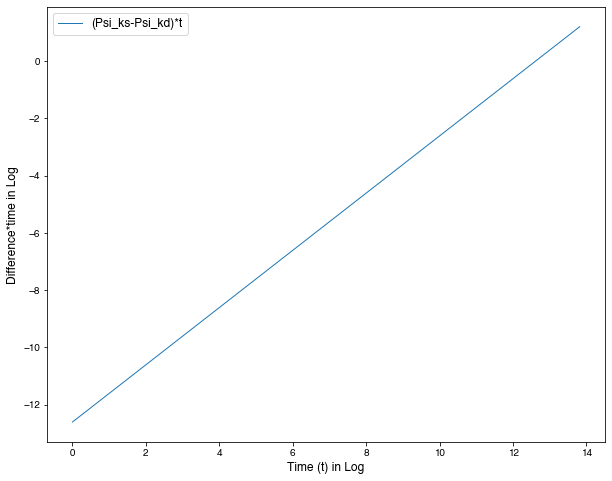

In [113]:
t = np.linspace(0, int(1e6), int(1e6))
fig, ax = plt.subplots(1,1)
ax.plot(np.log(t), np.log(t*diff), label="(Psi_ks-Psi_kd)*t")
ax.set_xlabel("Time (t) in Log")
ax.set_ylabel("Difference*time in Log")
ax.legend()
plt.savefig('loglog.png')
plt.show()

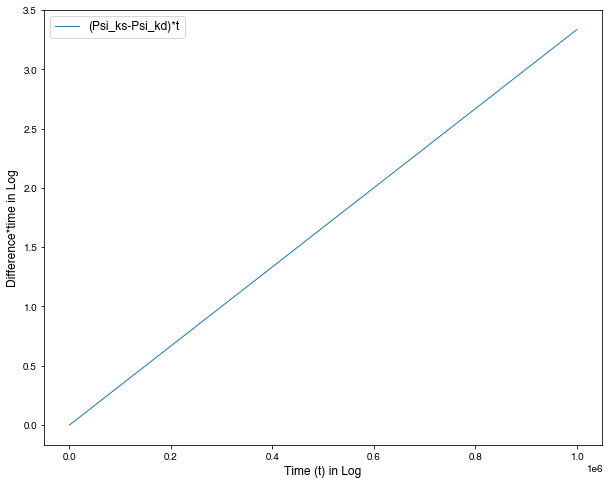

In [111]:
t = np.linspace(0, int(1e6), int(1e6))
diff = psi_ks - psi_kd
fig, ax = plt.subplots(1,1)
ax.plot(t, t*diff, label="(Psi_ks-Psi_kd)*t")
ax.set_xlabel("Time (t)")
ax.set_ylabel("Difference*time")
ax.legend()
plt.savefig('loglog.png')
plt.show()

## Empirical Data For Parameters

### Savings Rate
Taking the macro approach => savings rate is roughly equal to the gdp divided by the real investment

In [43]:
gdp = pd.read_csv('GDPC1.csv')
gdp.set_index('DATE', inplace=True)
df = pd.DataFrame(gdp)
df.columns = ['gdp']

investment = pd.read_csv('GPDIC1.csv')
investment.set_index('DATE', inplace=True)
df.loc[:,'investment'] = investment
df.loc[:,'saving'] = df.investment / df.gdp

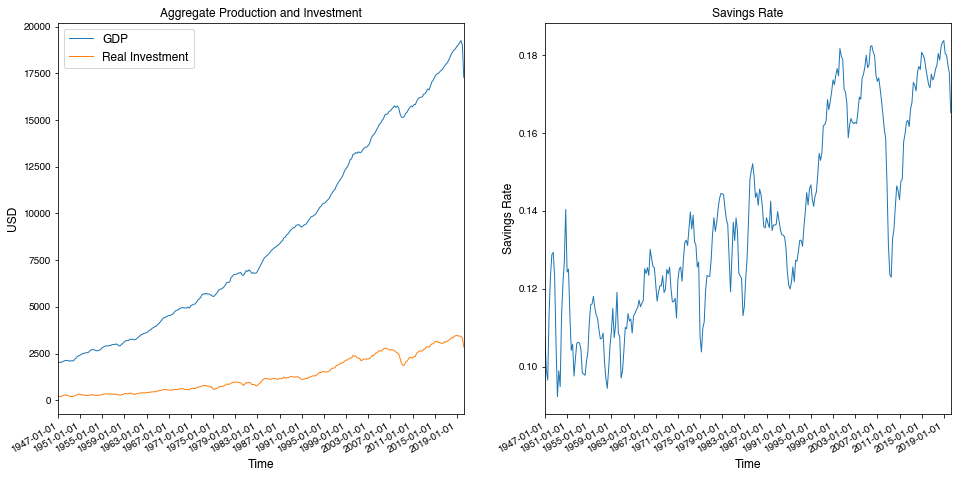

In [94]:
import matplotlib.dates as mdates
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16,8)

ax[0].plot(df.gdp, label='GDP')
ax[0].plot(df.investment, label='Real Investment')
ax[0].set_title('Aggregate Production and Investment')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('USD')
ax[0].legend()
ax[0].set_xlim(df.index[0], df.index[-1])
ax[0].set_xticks(ax[0].get_xticks()[::16])

ax[1].plot(df.saving, label='Savings Rate')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Savings Rate')
ax[1].set_title('Savings Rate')
ax[1].set_xticks(ax[1].get_xticks()[::16])
ax[1].set_xlim(df.index[0], df.index[-1])
fig.autofmt_xdate()
plt.show()